<font size=8>**Air Quality Data in India**</font><br>
<font size=6>A case study on the Air quality Data analysis</font></br></br>
<font size=4>Contributors :</font></br>
><font size=2>Ayush (CB.EN.U4CSE19106)</font><br>
><font size=2>Monish (CB.EN.U4CSE19110)</font><br>
><font size=2>Mahima Lolla (CB.EN.U4CSE19128)</font>


<font size=4>Let's import the necesssary prerequisites (packages) and dataframe from a .csv file</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


<font size=5>**Step 1 : Data Cleanup**</font>

<font size=4>**Converting objects to appropriate datatype**</font>

In [3]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%dT', errors = 'coerce')

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

<font size=4>**Handling missing values**</font><br>
Let us find the number and percentage of missing values in the imported dataframe

In [7]:
missing_vals=pd.concat([df.isnull().sum(), 100 * df.isnull().sum() / len(df)], axis=1)
missing_vals.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'}, inplace=True)
missing_vals

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


<font size=4>**Visualizing missing values**</font>

Let us see how much of the dataframe actually contains values and not empty entries.

<AxesSubplot:>

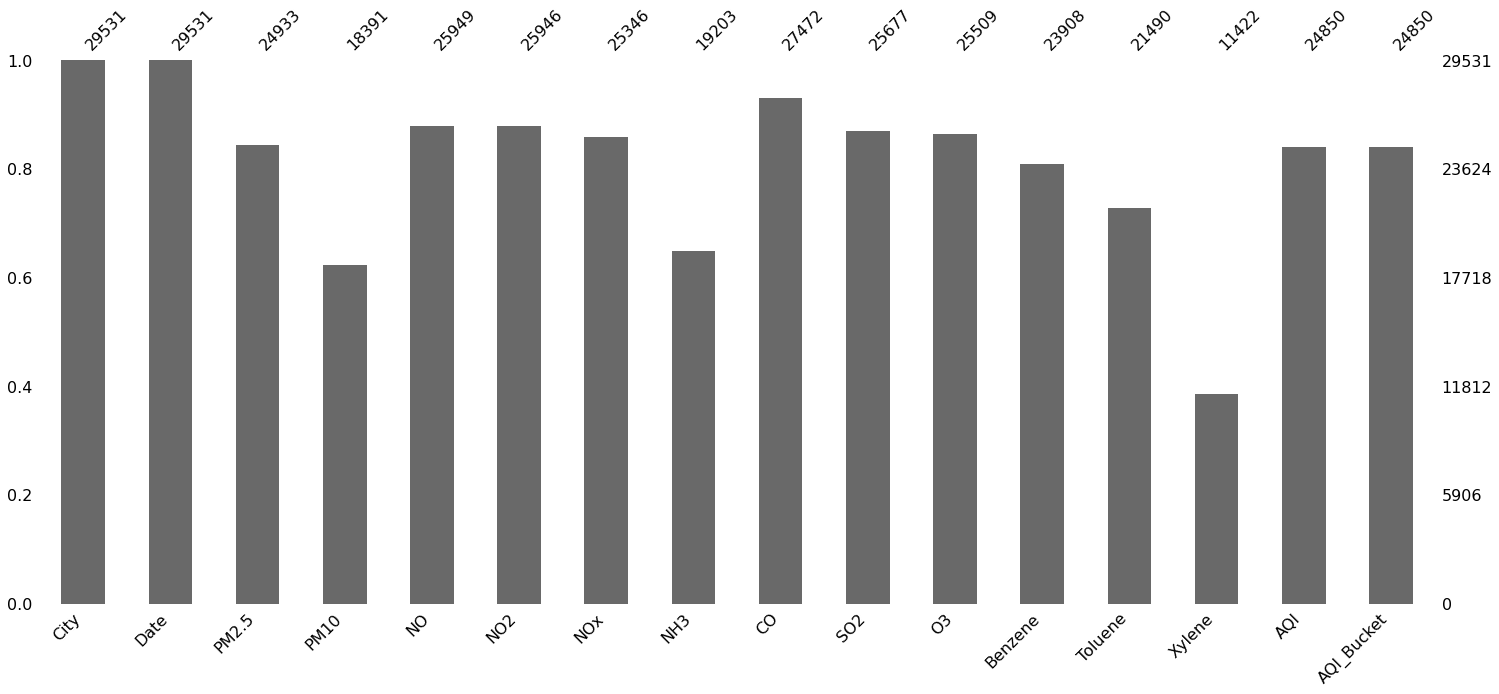

In [8]:
msno.bar(df)

By using a matrix plot, we can estimate the location of each missing values in the dataframe 

<AxesSubplot:>

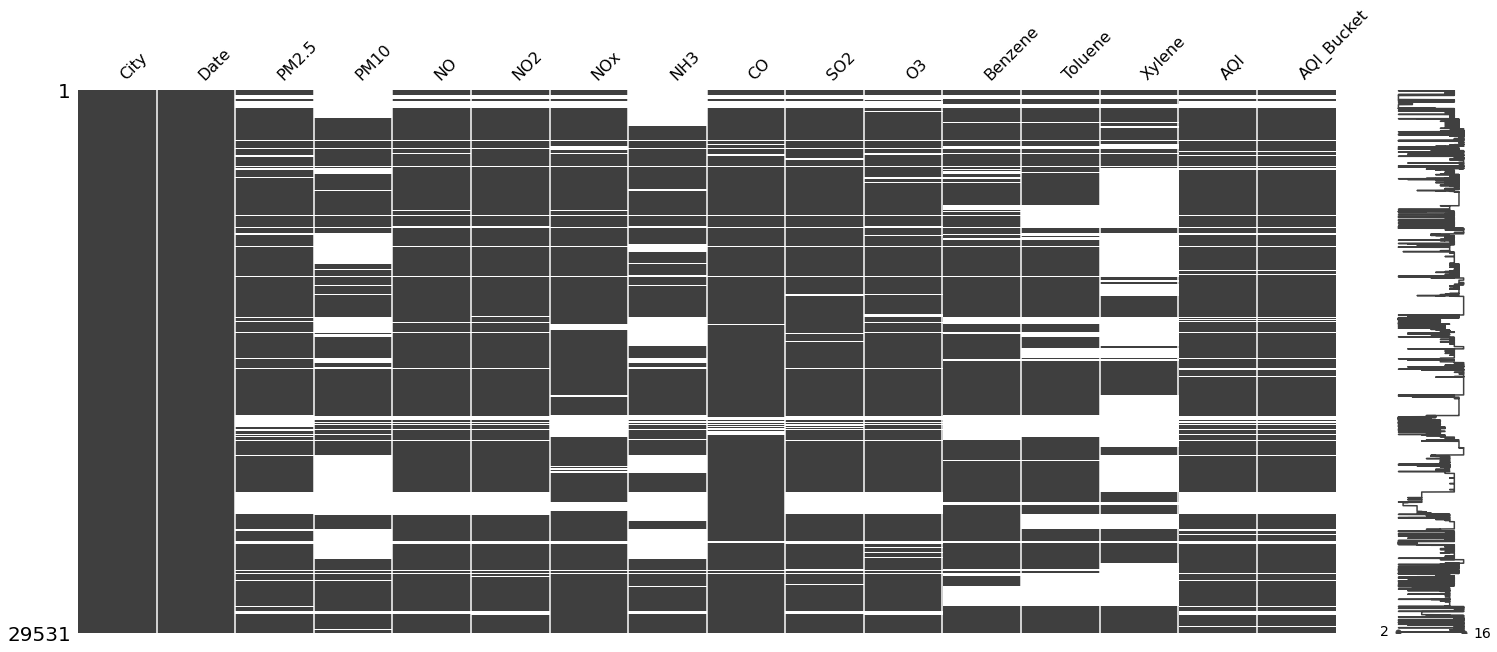

In [9]:
msno.matrix(df)

>From what we can see, this is a really dirty dataframe with a lot of missing values. Some columns have less than 40% of entries filled, hence we have to clean this dataframe with even more caution.

Let us now see the relation between the different missing values. From the heatmap, we can see and try to infer what is the cause and relation between the different missing values in the dataframe.

<AxesSubplot:>

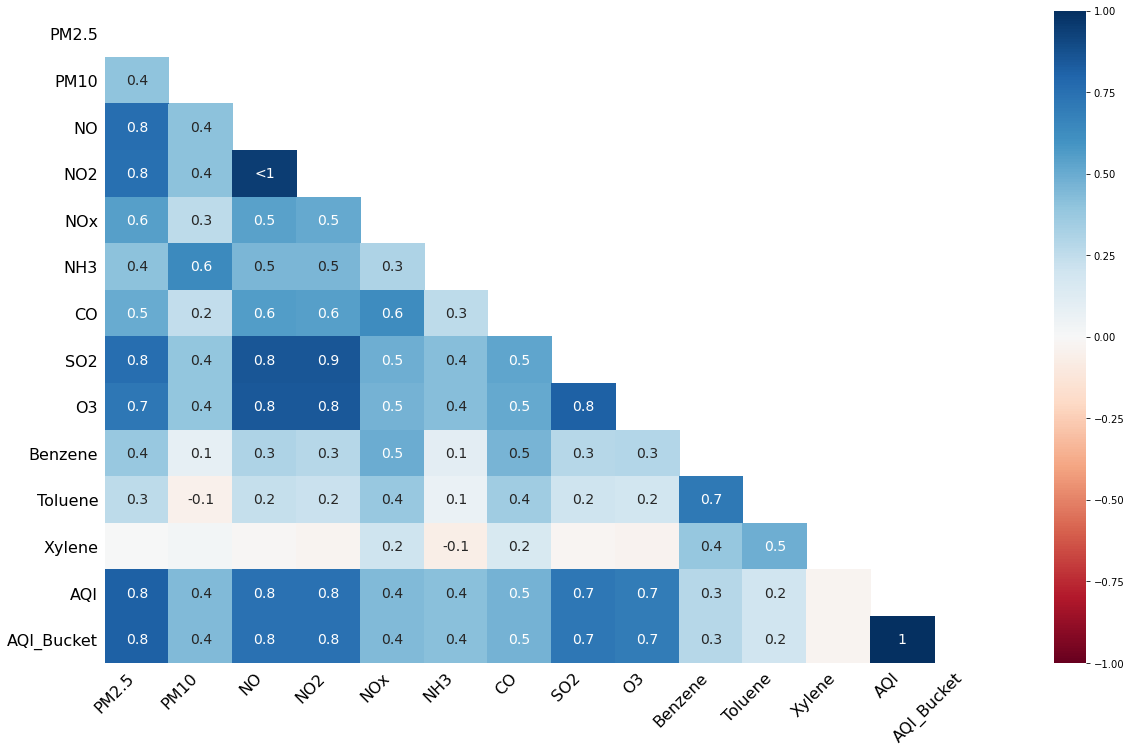

In [10]:
msno.heatmap(df)

<AxesSubplot:>

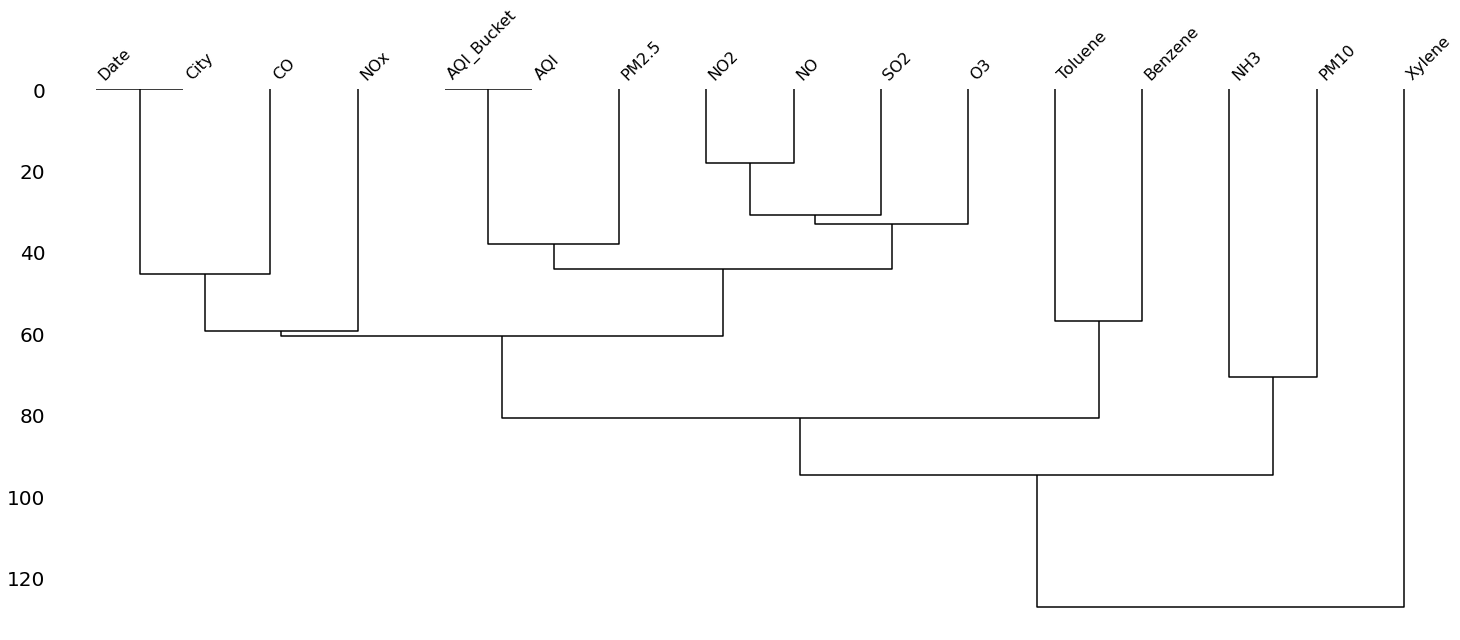

In [11]:
msno.dendrogram(df)

<font size=4>**Filling up values for missing data**</font><br><br>
Since this is a time series dataframe, we can fill up the unavailable values by using interpolation to get a consistent change in the values from the start of missing index till the end.

In [12]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Since this dataframe is time series, but we have time series for multiple cities in the same dataframe, we divide the dataframe in groups of cities as a list of dataframes. Just as a safe measure, we also sort the citywise dataframes in ascending order of date to make things easier on us.

In [13]:
df1=df.copy()
cities=df1['City'].unique()
list_of_city_info=[]
for name in cities:
    list_of_city_info.append(df1[df1.City==name].sort_values(by='Date', ascending=True))

We now fill the empty values of each city by using interpolation with anchors on both sides to provide for a smooth interpolation graph. For that, we iterate through each dataframe in the list and fill them with interpolation of values linearly. This filled data is now put in a fresh list of dataframes.

In [14]:
filled_citydata=[]
for citydata in list_of_city_info:
    temp=citydata
    temp.interpolate(limit_direction='both', inplace=True)
    filled_citydata.append(temp)

Since the interpolation of values is done, we can now merge the list of dataframes into a single dataframe.

In [15]:
df_new=filled_citydata[0].copy()
for i in range(1, len(filled_citydata)):
    df_new=pd.concat([df_new, filled_citydata[i]], axis=0)
df_new

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,209.0,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,209.0,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,209.0,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,209.0,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,209.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


After interpolation, let's check the dataframe we made after filling up empty values.

<AxesSubplot:>

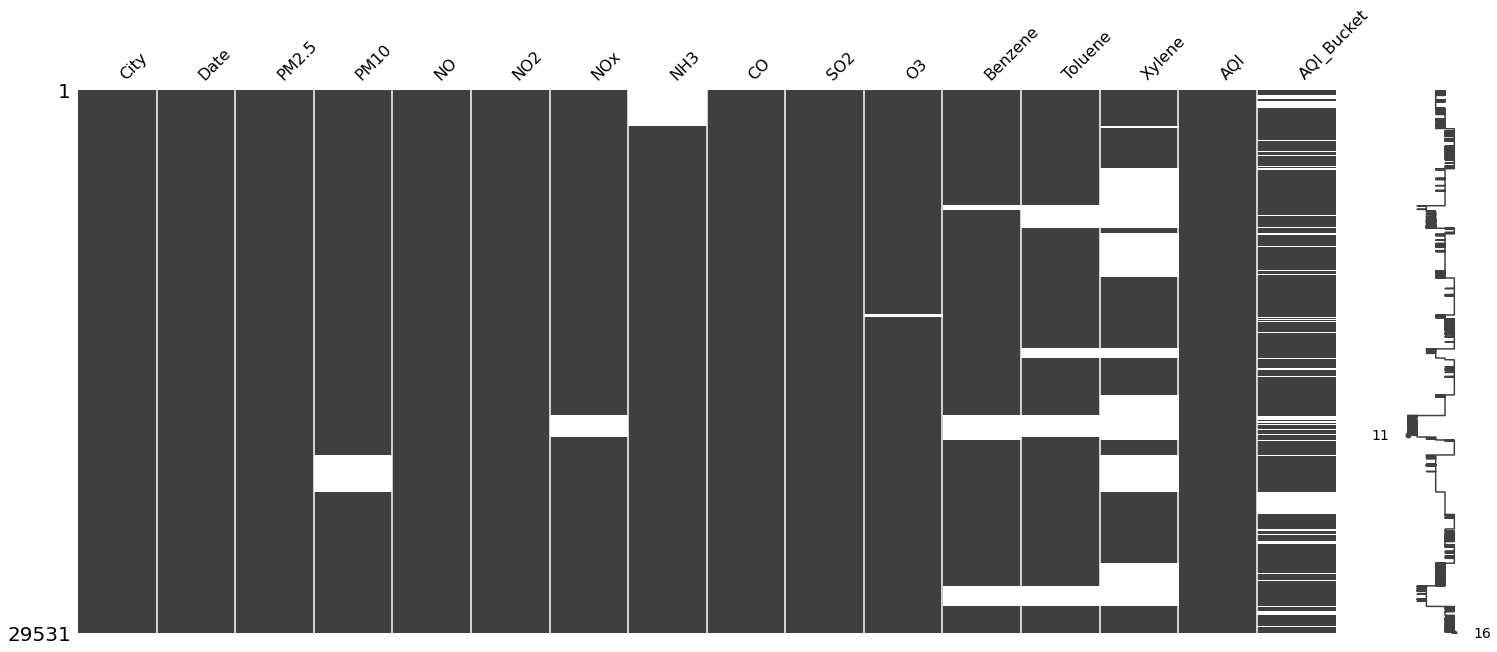

In [16]:
msno.matrix(df_new)

>As we can see, a lot of the missing data has been filled, but large patches of missing values ae still present. This shows that the readings of the pollutants in different cities may be mising. This can be attributed to reasons like the station not having the proper equipment, system failure or other malfunctions.

Let us fill the remaining patches of not available slots with the columnwise mean.

In [17]:
df_new2 = df_new.fillna(df_new.mean())

<ipython-input-17-83ea5965b2b4>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_new2 = df_new.fillna(df_new.mean())


Visuaizing the new dataframe

<AxesSubplot:>

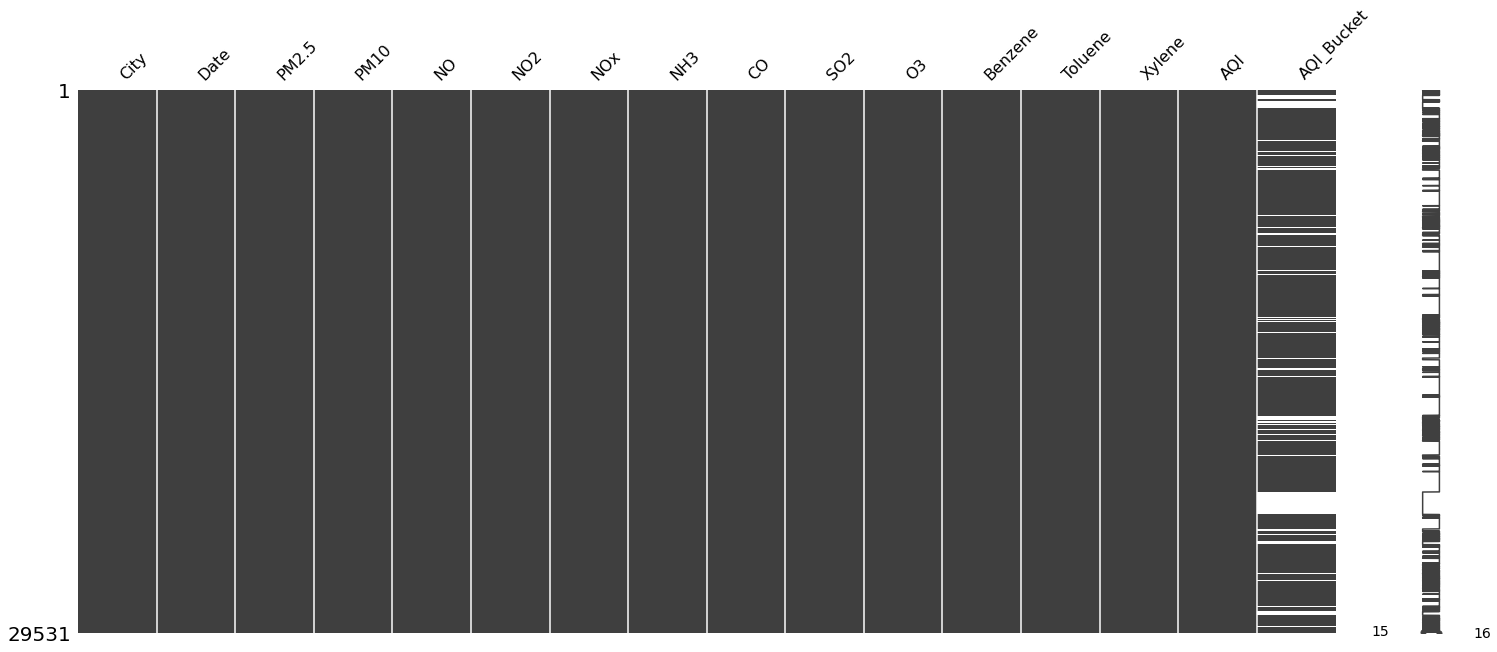

In [18]:
msno.matrix(df_new2)

We know that the AQI is the maximum value of the entire column of indexes of pollutants/gases. Using this information, we can fill in the values of the AQI column for the newly filled daatframe.

In [19]:
df_new3=df_new2.copy()
df_new3['AQI']=df_new3.iloc[:,2:14].max(axis=1)
df_new3.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
18861,Jorapokhar,2020-06-23,23.900000,74.86,26.150000,11.18000,33.134389,9.030000,1.910000,15.970000,83.050000,3.526653,8.217668,3.660243,83.050000,Moderate
2038,Aizawl,2020-04-09,39.150000,45.79,3.320000,0.31000,4.470000,22.950000,0.390000,7.810000,7.660000,6.270000,6.660000,3.660243,45.790000,Satisfactory
5978,Bengaluru,2019-08-12,18.620000,46.51,12.490000,21.34000,26.780000,14.070000,0.780000,4.060000,17.110000,0.760000,2.220000,3.660243,46.510000,Satisfactory
10172,Coimbatore,2020-05-06,23.970000,26.28,0.730000,33.82000,34.510000,5.648571,1.420000,6.120000,27.270000,0.000000,0.010000,3.660243,34.510000,Satisfactory
1229,Ahmedabad,2018-05-14,49.070000,141.54,8.510000,30.74000,21.340000,24.975286,8.510000,88.300000,27.480000,6.890000,31.880000,0.650000,141.540000,Poor
5723,Bengaluru,2018-11-30,43.160000,79.92,10.450000,28.44000,30.830000,20.640000,0.890000,5.460000,47.850000,0.610000,1.860000,3.660243,79.920000,Satisfactory
2394,Amaravati,2018-08-23,11.440000,32.62,3.080000,12.02000,8.900000,12.880000,0.740000,8.980000,33.900000,0.100000,0.080000,0.125000,33.900000,NaN
5064,Bengaluru,2017-02-09,38.040000,103.85,6.810000,45.51000,0.000000,21.680000,0.580000,6.220000,12.280000,3.560000,5.010000,3.660243,103.850000,Satisfactory
734,Ahmedabad,2017-01-04,156.020971,141.54,36.429155,15.45369,25.161441,24.975286,36.429155,65.576563,31.896176,0.000000,0.000000,0.000000,156.020971,NaN
23608,Mumbai,2019-10-20,15.090000,29.91,26.820000,21.00000,46.260000,21.130000,1.190000,11.060000,8.690000,4.250000,1.440000,0.450000,46.260000,Satisfactory


As we had seen in the previous matrix, the values of AQI buckets have yet to be filled. Since it is a categorical data, we create a function to calculate what the AQI bucket is from the given AQIs, and we put it in the new dataframe.

In [20]:
df_cleaned=df_new3.copy()
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
df_cleaned["AQI_Bucket"] = df_cleaned['AQI'].apply(lambda x: get_AQI_bucket(x))

In [21]:
df_cleaned

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,24.975286,0.92,27.64,133.36,0.00,0.02,0.00,141.54,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,24.975286,0.97,24.55,34.06,3.68,5.50,3.77,141.54,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,24.975286,17.40,29.07,30.70,6.80,16.40,2.25,141.54,Moderate
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,24.975286,1.70,18.59,36.08,4.43,10.14,1.00,141.54,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,24.975286,22.10,39.33,39.31,7.01,18.89,2.78,141.54,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,50.94,Satisfactory
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,74.09,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,65.73,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,49.97,Good


Let us confirm once more whether the missing values have been cleaned or not.

<AxesSubplot:>

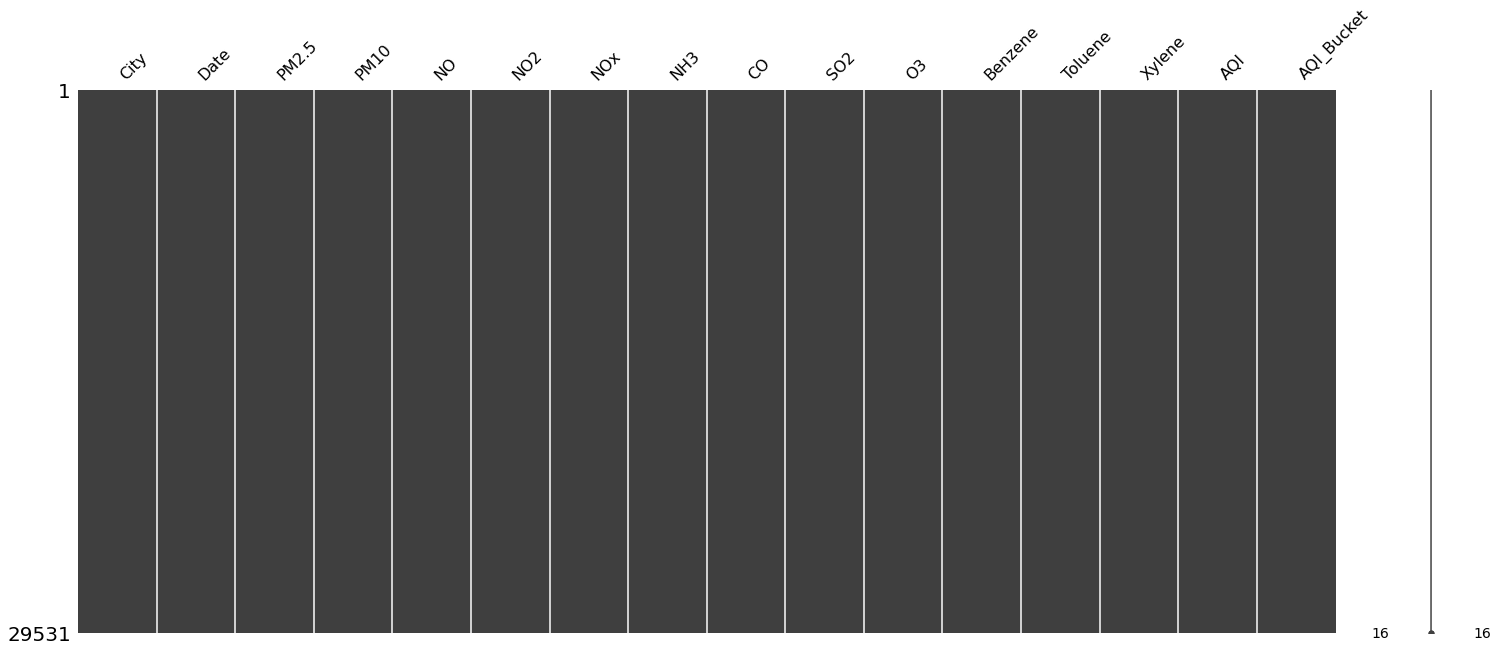

In [22]:
msno.matrix(df_cleaned)

Hence, all the missing values have been filled with appropriate values using interpolation and mean fill, and the AQI and AQI buckets have also been calculated and filled accordingly.

<font size=4>**Final dataframe after filling missing values**</font>

In [23]:
df_cleaned

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,24.975286,0.92,27.64,133.36,0.00,0.02,0.00,141.54,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,24.975286,0.97,24.55,34.06,3.68,5.50,3.77,141.54,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,24.975286,17.40,29.07,30.70,6.80,16.40,2.25,141.54,Moderate
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,24.975286,1.70,18.59,36.08,4.43,10.14,1.00,141.54,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,24.975286,22.10,39.33,39.31,7.01,18.89,2.78,141.54,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,50.94,Satisfactory
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,74.09,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,65.73,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,49.97,Good


<font size=4>**Removing outliers**</font>

In [24]:
df_cleaned.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,71.042188,122.129338,23.015583,27.033618,33.134389,24.975286,3.328664,22.407083,33.311059,3.526653,8.217668,3.660243,140.037089
std,74.679338,90.448287,33.385821,23.859672,31.409502,24.232148,13.002122,38.781125,21.308258,15.750079,18.154335,5.532966,98.586378
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.830000
25%,26.750000,58.530000,5.930000,10.650000,14.060000,8.575323,0.500000,5.870000,17.355833,0.150000,0.780000,0.720000,70.460000
50%,48.050000,106.030000,10.400000,20.270000,24.840000,18.860000,0.910000,9.690000,29.400000,1.319167,3.910000,3.660243,122.129338
75%,84.868441,152.410130,23.230000,35.240000,39.950000,36.330000,1.510000,17.840000,43.828103,3.526653,8.217668,3.660243,173.320000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,1000.000000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AQI'>

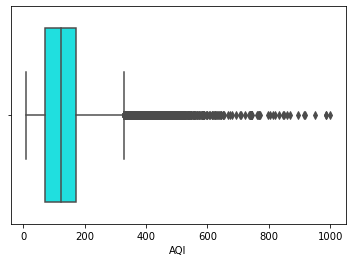

In [25]:
sns.boxplot(df_cleaned['AQI'],color='cyan')

In [26]:
df_wo=df_cleaned.copy()

df_wo['z-score']=(df_wo['AQI']-df_wo['AQI'].mean())/df_wo['AQI']
indexes = df_wo[ (df_wo['z-score'] >3) | (df_wo['z-score']<-3) ].index
print(indexes)
df_without_outlier=df_wo.drop(indexes)

Int64Index([ 2029,  2034,  2037,  2041,  2042,  2045,  2046,  2047,  2048,
             2049,
            ...
            29273, 29276, 29278, 29446, 29460, 29463, 29464, 29484, 29485,
            29525],
           dtype='int64', length=1345)


In [27]:
df_without_outlier

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,z-score
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,24.975286,0.92,27.64,133.36,0.00,0.02,0.00,141.54,Moderate,0.010618
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,24.975286,0.97,24.55,34.06,3.68,5.50,3.77,141.54,Moderate,0.010618
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,24.975286,17.40,29.07,30.70,6.80,16.40,2.25,141.54,Moderate,0.010618
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,24.975286,1.70,18.59,36.08,4.43,10.14,1.00,141.54,Moderate,0.010618
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,24.975286,22.10,39.33,39.31,7.01,18.89,2.78,141.54,Moderate,0.010618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,50.94,Satisfactory,-1.749059
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,74.09,Satisfactory,-0.890094
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,65.73,Satisfactory,-1.130490
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,49.97,Good,-1.802423


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AQI'>

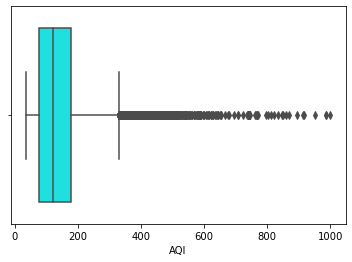

In [28]:
sns.boxplot(df_without_outlier['AQI'], color='cyan')

[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Aizawl'),
 Text(2, 0, 'Amaravati'),
 Text(3, 0, 'Amritsar'),
 Text(4, 0, 'Bengaluru'),
 Text(5, 0, 'Bhopal'),
 Text(6, 0, 'Brajrajnagar'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Chennai'),
 Text(9, 0, 'Coimbatore'),
 Text(10, 0, 'Delhi'),
 Text(11, 0, 'Ernakulam'),
 Text(12, 0, 'Gurugram'),
 Text(13, 0, 'Guwahati'),
 Text(14, 0, 'Hyderabad'),
 Text(15, 0, 'Jaipur'),
 Text(16, 0, 'Jorapokhar'),
 Text(17, 0, 'Kochi'),
 Text(18, 0, 'Kolkata'),
 Text(19, 0, 'Lucknow'),
 Text(20, 0, 'Mumbai'),
 Text(21, 0, 'Patna'),
 Text(22, 0, 'Shillong'),
 Text(23, 0, 'Talcher'),
 Text(24, 0, 'Thiruvananthapuram'),
 Text(25, 0, 'Visakhapatnam')]

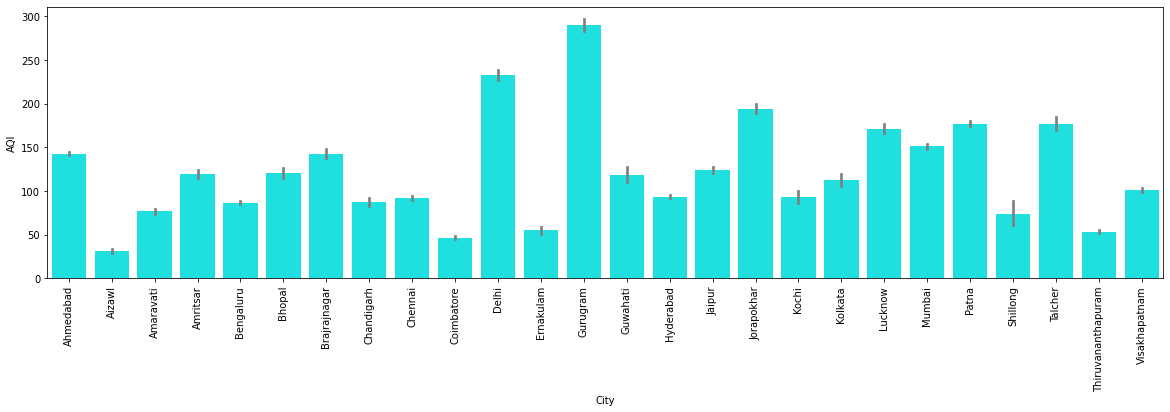

In [29]:
ext=df_wo[['City', 'AQI']]
ext=ext.sort_index(axis=1)

plt.figure(figsize=(20,5))
l = list(df_wo['City'].unique())
x=sns.barplot(x=ext.City, y=ext.AQI, errcolor='grey', color='cyan')
x.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='City', ylabel='AQI'>

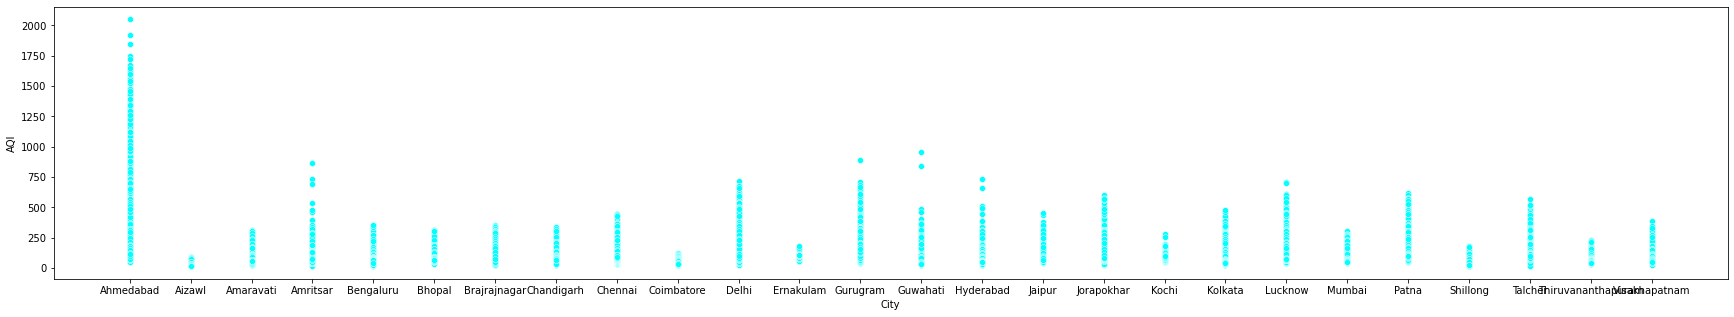

In [30]:
plt.figure(figsize=(30,5))
sns.scatterplot(x=df.City, y=df.AQI, color='cyan')

In [31]:
df_without_outlier['City'].value_counts()

Lucknow               2009
Ahmedabad             2009
Delhi                 2005
Chennai               2001
Mumbai                1972
Bengaluru             1951
Hyderabad             1901
Patna                 1858
Gurugram              1679
Visakhapatnam         1434
Amritsar              1192
Jorapokhar            1121
Jaipur                1112
Brajrajnagar           913
Talcher                912
Thiruvananthapuram     852
Amaravati              797
Kolkata                723
Guwahati               439
Chandigarh             290
Coimbatore             290
Bhopal                 288
Kochi                  151
Shillong               134
Ernakulam              114
Aizawl                  39
Name: City, dtype: int64

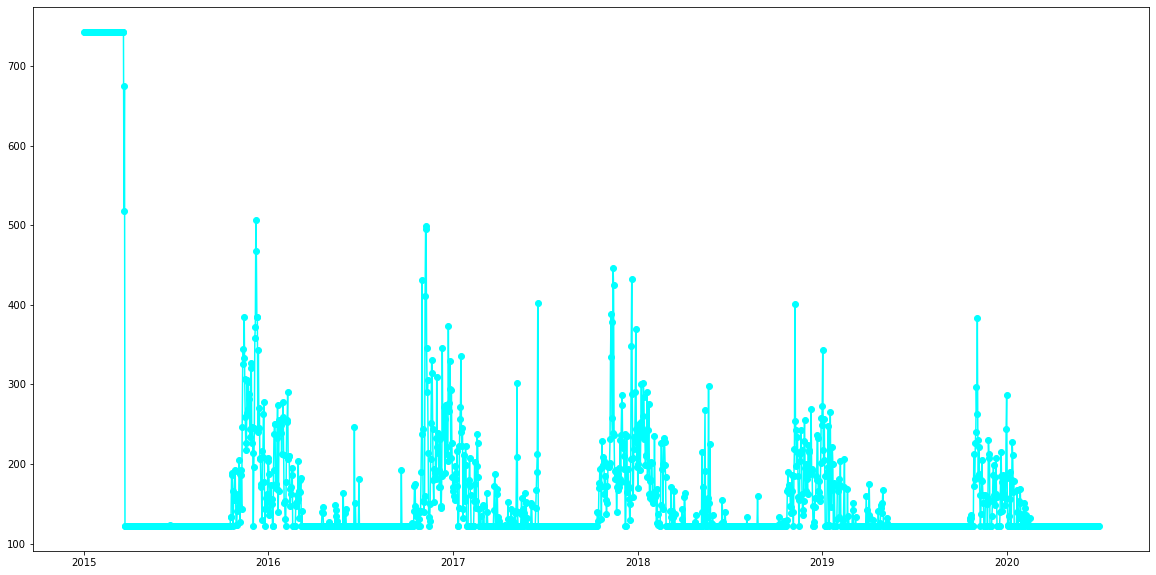

In [32]:
plt.figure(figsize= (20,10))

plt.plot_date(df_without_outlier[df_without_outlier.City=='Lucknow'].Date, df_without_outlier[df_without_outlier.City=='Lucknow'].AQI, linestyle ='solid', color='cyan')